In [1]:
import cv2
import numpy as np
from edge import sobel_edge
import tools
import matplotlib.cm as cm   
import math
from copy import deepcopy

In [2]:
img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# low pass filter
ka7 = np.ones((5, 5), dtype=float) / 80
img_lp = cv2.filter2D(gray, -1, ka7, borderType=cv2.BORDER_CONSTANT)

In [3]:
edges_sobel = sobel_edge(img_lp, threshold=15)

In [4]:
lines = cv2.HoughLinesP(edges_sobel, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)

img_proba = deepcopy(img)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_proba, (x1, y1), (x2, y2), (255, 0, 0), 1)  


In [5]:
"""
https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
"""
lines = cv2.HoughLines(edges_sobel, 1, np.pi/45, 200, None, 0, 0)

img_hough = deepcopy(img)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

        cv2.line(img_hough, pt1, pt2, (255, 0, 0), 1)

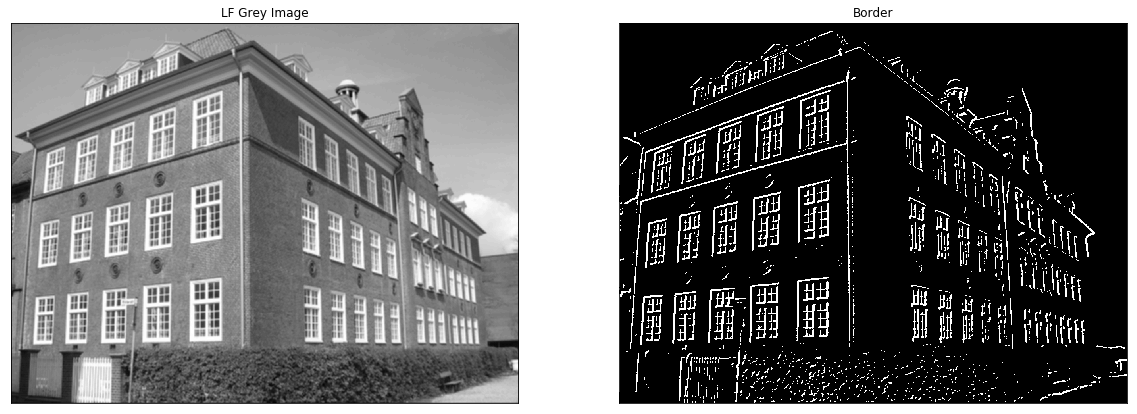

In [6]:
tools.multiPlot(1, 2, 
                (img_lp, edges_sobel),
                ('LF Grey Image', 'Border'),
                cmap_tuple=(cm.gray, cm.gray))

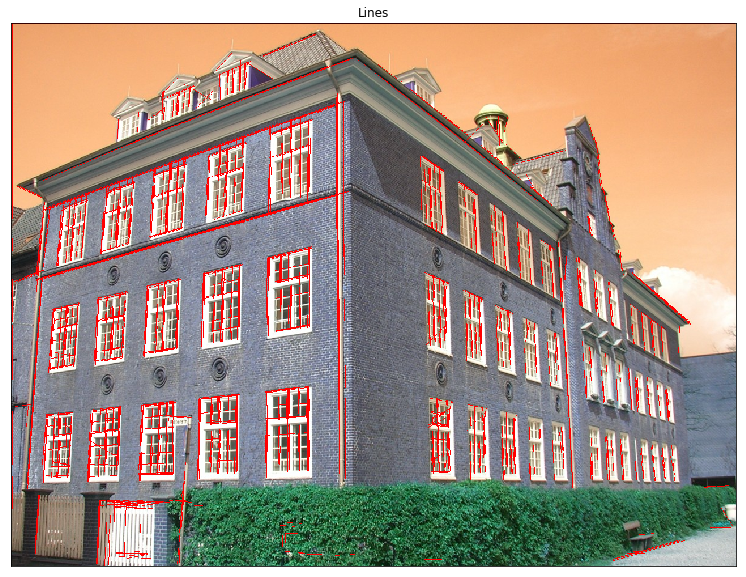

In [7]:
tools.multiPlot(1, 1, 
                (img_proba,),
                ('Lines',),
                cmap_tuple=(cm.gray,))

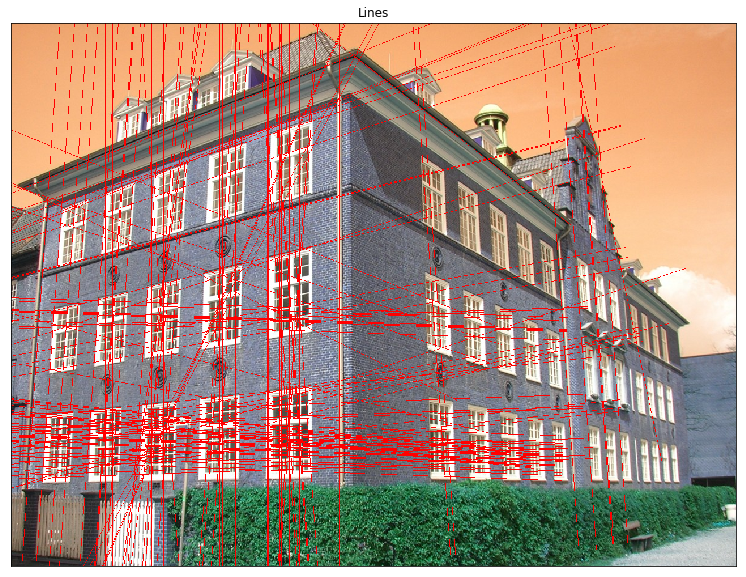

In [8]:
tools.multiPlot(1, 1, 
                (img_hough,),
                ('Lines',),
                cmap_tuple=(cm.gray,))